# Съём однокомнатной квартиры по данным Cian в регионах РФ

*Ноутбук был написан в рамках командной работы над проектом за 4 часа, немного некрасивый, не зато качает 500 квартир/секунду и строит графики =)*

In [1]:
import re
import time
import requests
import numpy as np
import pandas as pd
from multiprocessing import Pool

from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_filename = 'data/cian_regions_data.pkl'
data_excel_filename = 'data/cian_regions_data.xlsx'

# 1. Качаем данные

### Берём список регионов с Cian

In [3]:
html = requests.get('https://www.cian.ru').text

ниже кусок - это кусок из html, в котором в явном виде в json указаны все регионы

In [4]:
l = [{"subdomainName":"www","id":1,"title":"Москва"},{"subdomainName":"www","id":4593,"title":"Московская область"},{"subdomainName":"spb","id":2,"title":"Санкт-Петербург"},{"subdomainName":"spb","id":4588,"title":"Ленинградская область"},{"subdomainName":"www","id":4553,"title":"Адыгея"},{"subdomainName":"www","id":4554,"title":"Алтай (Республика)"},{"subdomainName":"www","id":4555,"title":"Алтайский край"},{"subdomainName":"www","id":4556,"title":"Амурская область"},{"subdomainName":"www","id":4557,"title":"Архангельская область"},{"subdomainName":"www","id":4558,"title":"Астраханская область"},{"subdomainName":"ufa","id":4560,"title":"Башкортостан"},{"subdomainName":"belgorod","id":4561,"title":"Белгородская область"},{"subdomainName":"bryansk","id":4562,"title":"Брянская область"},{"subdomainName":"www","id":4563,"title":"Бурятия"},{"subdomainName":"vladimir","id":4564,"title":"Владимирская область"},{"subdomainName":"volgograd","id":4565,"title":"Волгоградская область"},{"subdomainName":"www","id":4566,"title":"Вологодская область"},{"subdomainName":"voronezh","id":4567,"title":"Воронежская область"},{"subdomainName":"www","id":4568,"title":"Дагестан"},{"subdomainName":"www","id":4569,"title":"Еврейская АО"},{"subdomainName":"www","id":187450,"title":"Забайкальский край"},{"subdomainName":"ivanovo","id":4570,"title":"Ивановская область"},{"subdomainName":"www","id":4571,"title":"Ингушетия"},{"subdomainName":"irkutsk","id":4572,"title":"Иркутская область"},{"subdomainName":"www","id":4573,"title":"Кабардино-Балкария"},{"subdomainName":"kaliningrad","id":4574,"title":"Калининградская область"},{"subdomainName":"www","id":4575,"title":"Калмыкия"},{"subdomainName":"kaluga","id":4576,"title":"Калужская область"},{"subdomainName":"www","id":4577,"title":"Камчатский край"},{"subdomainName":"www","id":4578,"title":"Карачаево-Черкесия"},{"subdomainName":"petrozavodsk","id":4579,"title":"Карелия"},{"subdomainName":"kemerovo","id":4580,"title":"Кемеровская область"},{"subdomainName":"www","id":4581,"title":"Кировская область"},{"subdomainName":"www","id":4582,"title":"Коми"},{"subdomainName":"www","id":4583,"title":"Костромская область"},{"subdomainName":"krasnodar","id":4584,"title":"Краснодарский край"},{"subdomainName":"krasnoyarsk","id":4585,"title":"Красноярский край"},{"subdomainName":"krym","id":181462,"title":"Крым"},{"subdomainName":"www","id":4586,"title":"Курганская область"},{"subdomainName":"www","id":4587,"title":"Курская область"},{"subdomainName":"lipetsk","id":4589,"title":"Липецкая область"},{"subdomainName":"www","id":4590,"title":"Магаданская область"},{"subdomainName":"yoshkar-ola","id":4591,"title":"Марий Эл"},{"subdomainName":"www","id":4592,"title":"Мордовия"},{"subdomainName":"www","id":4594,"title":"Мурманская область"},{"subdomainName":"www","id":4595,"title":"Ненецкий АО"},{"subdomainName":"nn","id":4596,"title":"Нижегородская область"},{"subdomainName":"novgorod","id":4597,"title":"Новгородская область"},{"subdomainName":"novosibirsk","id":4598,"title":"Новосибирская область"},{"subdomainName":"omsk","id":4599,"title":"Омская область"},{"subdomainName":"orenburg","id":4600,"title":"Оренбургская область"},{"subdomainName":"www","id":4601,"title":"Орловская область"},{"subdomainName":"penza","id":4602,"title":"Пензенская область"},{"subdomainName":"perm","id":4603,"title":"Пермский край"},{"subdomainName":"www","id":4604,"title":"Приморский край"},{"subdomainName":"pskov","id":4605,"title":"Псковская область"},{"subdomainName":"rostov","id":4606,"title":"Ростовская область"},{"subdomainName":"ryazan","id":4607,"title":"Рязанская область"},{"subdomainName":"samara","id":4608,"title":"Самарская область"},{"subdomainName":"saratov","id":4609,"title":"Саратовская область"},{"subdomainName":"www","id":4610,"title":"Саха (Якутия)"},{"subdomainName":"www","id":4611,"title":"Сахалинская область"},{"subdomainName":"ekb","id":4612,"title":"Свердловская область"},{"subdomainName":"www","id":184723,"title":"Севастополь"},{"subdomainName":"www","id":4613,"title":"Северная Осетия-Алания"},{"subdomainName":"smolensk","id":4614,"title":"Смоленская область"},{"subdomainName":"stavropol","id":4615,"title":"Ставропольский край"},{"subdomainName":"www","id":4617,"title":"Тамбовская область"},{"subdomainName":"kazan","id":4618,"title":"Татарстан"},{"subdomainName":"tver","id":4619,"title":"Тверская область"},{"subdomainName":"www","id":4620,"title":"Томская область"},{"subdomainName":"tula","id":4621,"title":"Тульская область"},{"subdomainName":"www","id":4622,"title":"Тыва"},{"subdomainName":"tyumen","id":4623,"title":"Тюменская область"},{"subdomainName":"izhevsk","id":4624,"title":"Удмуртия"},{"subdomainName":"ulyanovsk","id":4625,"title":"Ульяновская область"},{"subdomainName":"www","id":4627,"title":"Хабаровский край"},{"subdomainName":"www","id":4628,"title":"Хакасия"},{"subdomainName":"hmao","id":4629,"title":"Ханты-Мансийский АО"},{"subdomainName":"chelyabinsk","id":4630,"title":"Челябинская область"},{"subdomainName":"www","id":4631,"title":"Чечня"},{"subdomainName":"www","id":4633,"title":"Чувашия"},{"subdomainName":"www","id":4634,"title":"Чукотский АО"},{"subdomainName":"yanao","id":4635,"title":"Ямало-Ненецкий АО"},{"subdomainName":"yaroslavl","id":4636,"title":"Ярославская область"}]
regions = pd.DataFrame(l)[['id','title']]
print(regions.shape)
regions.head()

(85, 2)


,id,title
0,1,Москва
1,4593,Московская область
2,2,Санкт-Петербург
3,4588,Ленинградская область
4,4553,Адыгея


### Формируем url'ы для скачивания по регионам

In [5]:
url_template = 'https://www.cian.ru/cat.php?deal_type=rent&engine_version=2&offer_type=flat&p={}&region={}&room1=1&type=4'
regions['url_template'] = [url_template.format('{}',id) for id in regions.id]
regions.head()

,id,title,url_template
0,1,Москва,https://www.cian.ru/cat.php?deal_type=rent&eng...
1,4593,Московская область,https://www.cian.ru/cat.php?deal_type=rent&eng...
2,2,Санкт-Петербург,https://www.cian.ru/cat.php?deal_type=rent&eng...
3,4588,Ленинградская область,https://www.cian.ru/cat.php?deal_type=rent&eng...
4,4553,Адыгея,https://www.cian.ru/cat.php?deal_type=rent&eng...


### Скачиваем по 2000 объявлений с каждого региона

Установим нужное нам кол-во страниц на область (на странице 50 объявлений)

In [6]:
LISTINGS_PER_PAGE = 50
NUMBER_OF_LISTINGS_PER_REGION = 2000
NUMBER_OF_PAGES_PER_REGION = int(NUMBER_OF_LISTINGS_PER_REGION/LISTINGS_PER_PAGE)

Вспомогательные функции

In [7]:
def multithread_it(func, data, threads=None, max_threads=25, min_threads=1):
    # указываем обрабатывающую функцию и список данных, на которых нужно что-то посчитать
    # получаем список результатов в том же порядке, что и входные данные
    if not threads:
        threads = max(min_threads,min(len(data), max_threads))
    with Pool(threads) as p:
        result = p.map(func, data)
    return result

In [8]:
def get_data_from_url(url):
    html = requests.get(url).text
    listings = html.split('div class="serp-item__solid">\n\t\t\n')
    listings = [listing for i, listing in enumerate(listings) if i%2==1]

    rent = []
    for listing in listings:
        price = int(listing.split('руб')[0].replace(' ',''))
        area = int(listing.split('<div class="serp-item__solid">')[1].split('&nbsp;')[0])
        rent.append([price, area])
    return rent

Качаем (примерно 4 секунды на скачивание 2000 квартир с региона)

In [9]:
rent = []
url_column = np.argmax(regions.columns=='url_template')
for r in tqdm(regions.values.tolist()):
    try:
        urls = [r[url_column].format(i) for i in range(NUMBER_OF_PAGES_PER_REGION)]
        listings = multithread_it(get_data_from_url, urls, threads=25)
        listings = sum(listings,[])
        rent.append(listings)
        time.sleep(0.5)
    except:
        rent.append(None)

100%|██████████| 85/85 [05:16<00:00,  3.56s/it]


In [10]:
regions['listings'] = rent + [None]*(len(regions)-len(rent))

### Добавляем статистику

In [11]:
def get_median_price_1m2(list_of_listings):
    return np.median([i[0]/i[1] for i in list_of_listings])

In [12]:
median_area = np.median([i[1] for i in sum(list(regions.listings[:10]), [])])

regions['median_price_1m2'] = [get_median_price_1m2(listing) if listing else None for listing in regions.listings]
regions['price_per_typical_area'] = [median_area*i for i in regions.median_price_1m2]

А этим потом можно заполнить пропуски, хотя лучше как-то по географическим соседям хотя бы брать


In [13]:
regions.price_per_typical_area.median()

10812.14421252372

##### сохраняем скачанные данные

In [14]:
regions.to_pickle(data_filename)
regions.to_excel(data_excel_filename)

# Можно посмотреть на разброс цен внутри регионов

In [15]:
def get_rent_price_28m_hist(region_id = 0, bins=40):
    df = pd.DataFrame(regions.listings[region_id], columns=['price','area'])
    df['price_if_area_is_28'] = df.price/df.area*28
    df.price_if_area_is_28.hist(bins=bins)
    plt.title(regions.title[region_id]+' - стоимость аренды 28м2')

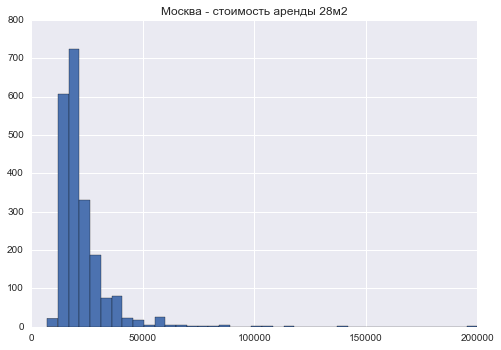

In [16]:
get_rent_price_28m_hist(0)

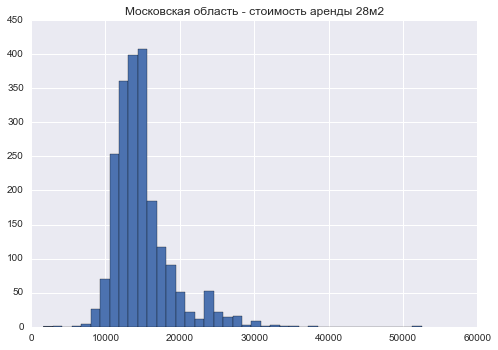

In [17]:
get_rent_price_28m_hist(1)

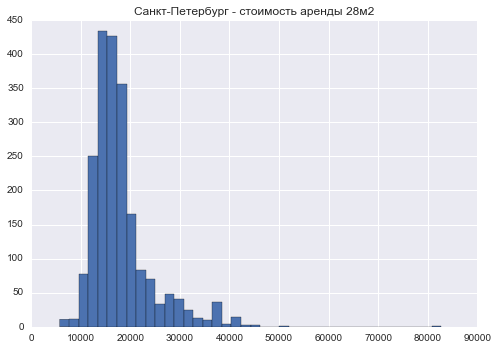

In [18]:
get_rent_price_28m_hist(2)

Разброс цен/метража в Москве

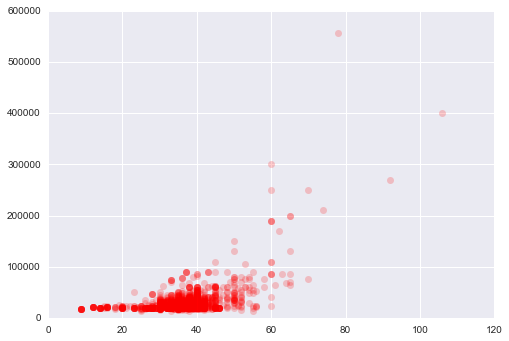

In [19]:
price = [i[0] for i in regions.listings[0]]
area = [i[1] for i in regions.listings[0]]
plt.plot(area, price, 'ro', alpha=0.2)

(10000, 100000)

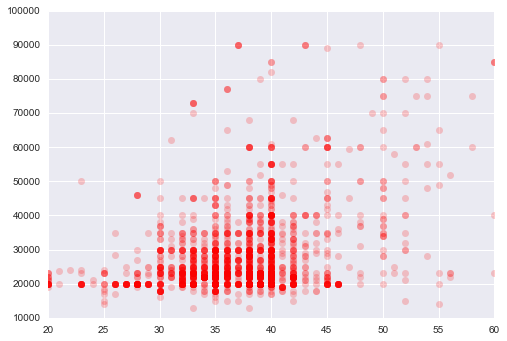

In [20]:
price = [i[0] for i in regions.listings[0]]
area = [i[1] for i in regions.listings[0]]
plt.plot(area, price, 'ro', alpha=0.2)
plt.xlim(20,60)
plt.ylim(10000,100000)

-----

-----

-----

# Графики на основе собранных данных из excel

Данные собирались не только с циан и сводились в excel, поэтому здесь читается этот сводный файл и строятся графики для статьи

In [21]:
shaverma = pd.read_excel('Shaverma Index.xlsx')

##### средние показатели по стране

In [22]:
for col in shaverma.columns[2:]:
    try:
        print(col.strip(),shaverma[col].median())
    except:
        pass

salary 26070.0
rent 8820.777777777777
minimum4living 9431.0
shaverma 120.0
free_money 8200.0
shaverma_index_daily 2.42
classic_bigmac_index 7.24
normalized_classic_bigmac_index 0.37
normalized_shaverma_index_daily 0.22


##### Индекс шаурмы (кол-во шаурмы / день)

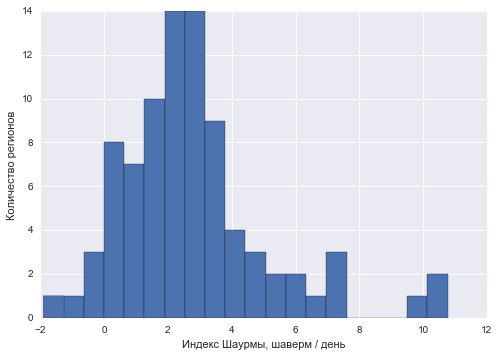

In [23]:
shaverma.shaverma_index_daily.hist(bins=20)
plt.xlabel('Индекс Шаурмы, шаверм / день')
plt.ylabel('Количество регионов')

##### Цена шаурмы

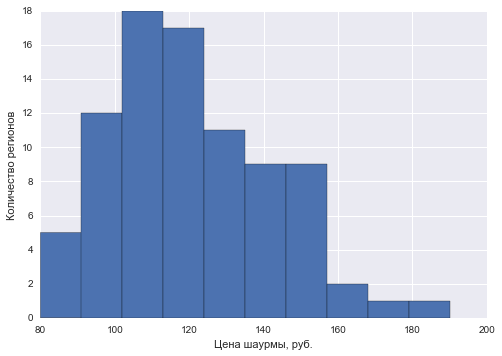

In [24]:
shaverma.shaverma.hist(bins=10)
plt.xlabel('Цена шаурмы, руб.')
plt.ylabel('Количество регионов')

##### Зарплата

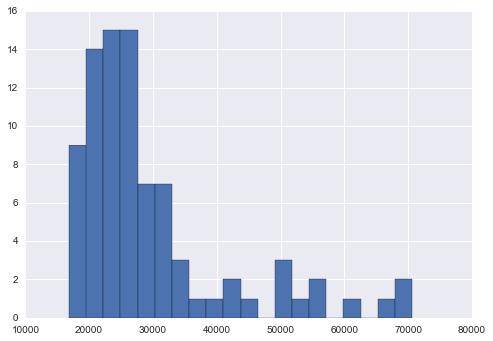

In [25]:
shaverma.salary.hist(bins=20)

##### Аренда

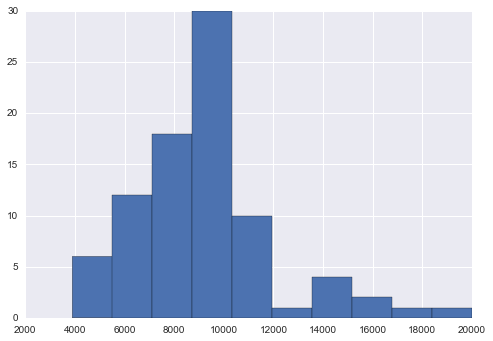

In [26]:
shaverma.rent.hist()